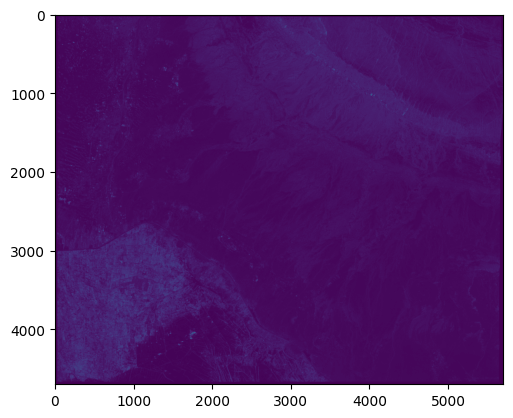

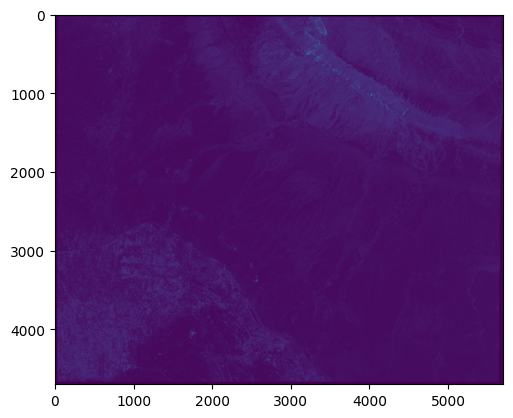

In [1]:
# READING TIFF IMAGE
from rasterio.plot import show
import geotiff
import tifffile
from PIL import Image
img1= Image.open('D:\mhrs\HH-ALPSRP245160560-H2.2_UA.tif')
img2= Image.open('D:\mhrs\HV-ALPSRP245160560-H2.2_UA.tif')
show(img1)
show(img2)
pixels = img1.load()
pixels = img2.load()

In [2]:
# OBTAIN META DATA ABOUT TIFF IMAGE
import rasterio
with rasterio.open("D:\mhrs\HH-ALPSRP245160560-H2.2_UA.tif") as dataset1:
    width = dataset1.width
    height = dataset1.height
    print("Image Size (Width x Height):", width, "x", height)
    num_bands = dataset1.count
    print("Number of Bands in HH image:", num_bands)
with rasterio.open("D:\mhrs\HV-ALPSRP245160560-H2.2_UA.tif") as dataset2:
    width = dataset2.width
    height = dataset2.height
    print("Image Size (Width x Height):", width, "x", height)
    num_bands = dataset2.count
    print("Number of Bands in HV image:", num_bands)

Image Size (Width x Height): 5700 x 4700
Number of Bands in HH image: 1
Image Size (Width x Height): 5700 x 4700
Number of Bands in HV image: 1


In [3]:
dataset2.count
dataset2.width
dataset2.height

4700

In [4]:
dataset1.count
dataset1.width
dataset1.height

4700

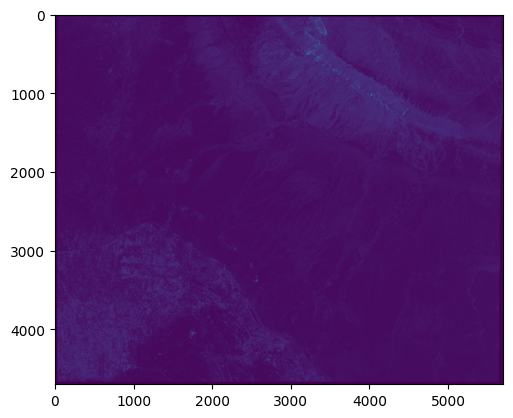

In [5]:
import matplotlib.pyplot as plt
plt.imshow(img1)
plt.imshow(img2)

In [7]:
import numpy as np
from PIL import Image
# FOR HH IMAGE
img1= Image.open("D:\mhrs\HH-ALPSRP245160560-H2.2_UA.tif")
img1_array = np.array(img1)

mean = np.mean(img1_array)
std_dev = np.std(img1_array)
min = np.min(img1_array)
max = np.max(img1_array)

print("Mean for image 1:", mean)
print("Standard Deviation for image 1:", std_dev)
print("Min:", min)
print("Max:", max)
# FOR HV IMAGE
img2= Image.open("D:\mhrs\HV-ALPSRP245160560-H2.2_UA.tif")
img2_array = np.array(img2)

mean2 = np.mean(img2_array)
std_dev2 = np.std(img2_array)
min2 = np.min(img2_array)
max2 = np.max(img2_array)

print("Mean for image 2:", mean2)
print("Standard Deviation for image 2:", std_dev2)
print("Min:", min2)
print("Max:", max2)

Mean for image 1: 2764.420061328854
Standard Deviation for image 1: 2036.9511865903962
Min: 0
Max: 65535
Mean for image 2: 891.0986516610676
Standard Deviation for image 2: 545.1735773547965
Min: 0
Max: 18314


In [8]:
#FOR HH IMAGE
width, height = img1.size
print("Width:", width)
print("Height:", height)
#FOR HV IMAGE
width2, height2 = img2.size
print("Width:", width2)
print("Height:", height2)

Width: 5700
Height: 4700
Width: 5700
Height: 4700


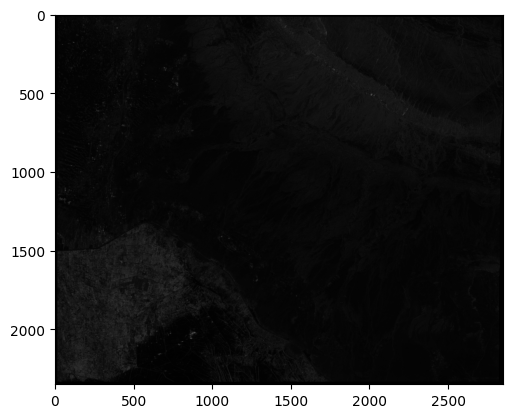

In [9]:
#REDUCING SIZE OF IMAGE
from rasterio.plot import show
import geotiff
import tifffile
import matplotlib.pyplot as plt
import cv2
import numpy as np
# FOR IMAGE 1
try:
    img1= cv2.imread("D:\mhrs\HH-ALPSRP245160560-H2.2_UA.tif")
    (height, width) = img1.shape[:2]    

    res1= cv2.resize(img1, (int(width / 2), int(height / 2)), interpolation=cv2.INTER_CUBIC)
    cv2.imwrite('result.tiff', res1)
 
except IOError:
    print('Error while reading files !!!')
plt.imshow(res1)

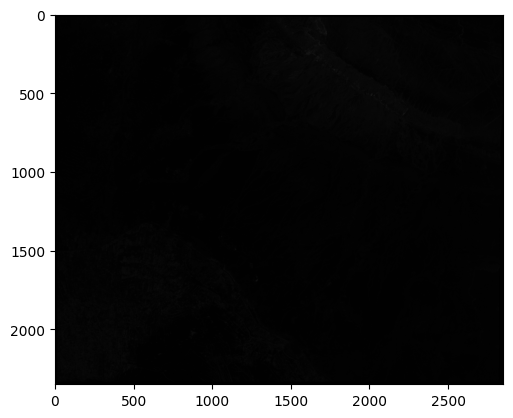

In [10]:
# FOR IMAGE 2
try:
    img2= cv2.imread("D:\mhrs\HV-ALPSRP245160560-H2.2_UA.tif")
    (height2, width2) = img2.shape[:2]    

    res2= cv2.resize(img2, (int(width2 / 2), int(height2 / 2)), interpolation=cv2.INTER_CUBIC)
    cv2.imwrite('result.tiff', res2)
 
except IOError:
    print('Error while reading files !!!')
plt.imshow(res2)

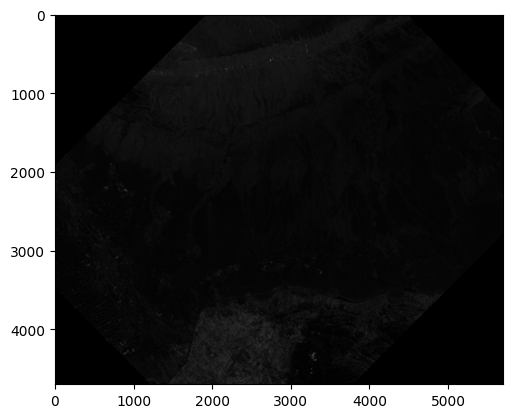

In [11]:
#ROTATING IMAGE 1
try:
    img = cv2.imread("D:\mhrs\HH-ALPSRP245160560-H2.2_UA.tif")
    (rows1, cols1) = img.shape[:2]
 
    M = cv2.getRotationMatrix2D((cols1 / 2, rows1 / 2), 45, 1)
    res1 = cv2.warpAffine(img1, M, (cols1, rows1))

    cv2.imwrite('result.tiff', res1)
 
except IOError:
    print('Error while reading files !!!')
plt.imshow(res1)

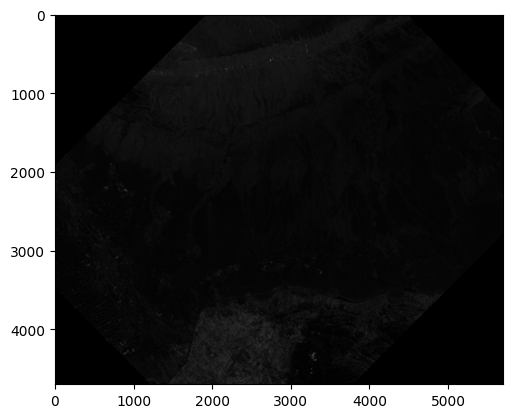

In [12]:
#ROTATING IMAGE 2
try:
    img2 = cv2.imread("D:\mhrs\HV-ALPSRP245160560-H2.2_UA.tif")
    (rows2, cols2) = img.shape[:2]
 
    M = cv2.getRotationMatrix2D((cols2 / 2, rows2 / 2), 45, 1)
    res2 = cv2.warpAffine(img1, M, (cols2, rows2))

    cv2.imwrite('result.tiff', res2)
 
except IOError:
    print('Error while reading files !!!')
plt.imshow(res2)

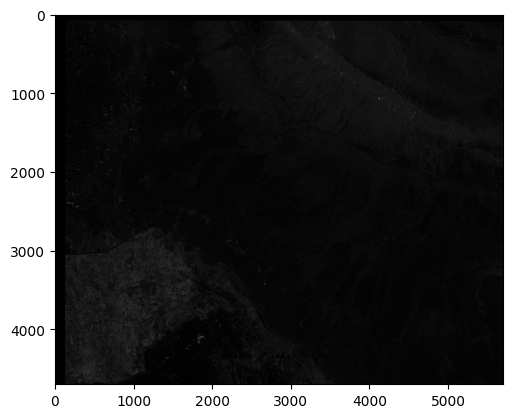

In [13]:
# Shifting image 1 by (100, 50).
M = np.float32([[1, 0, 100], [0, 1, 50]])
try:
    img1 = cv2.imread("D:\mhrs\HH-ALPSRP245160560-H2.2_UA.tif")
    res2 = cv2.warpAffine(img, M, (cols1, rows1))
    cv2.imwrite('result.tiff', res2)
 
except IOError:
    print('Error while reading files !!!')
plt.imshow(res2)

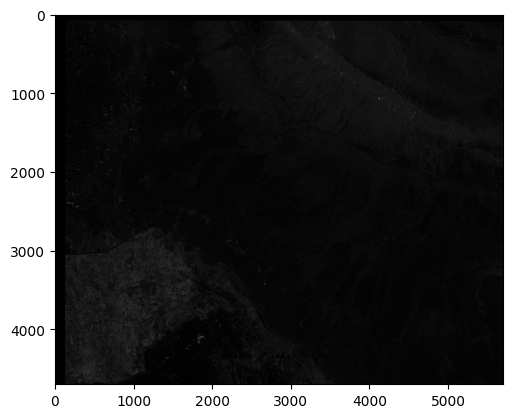

In [14]:
# Shifting image 2 by (100, 50).
M = np.float32([[1, 0, 100], [0, 1, 50]])
try:
    img2 = cv2.imread("D:\mhrs\HV-ALPSRP245160560-H2.2_UA.tif")
    res3 = cv2.warpAffine(img, M, (cols2, rows2))
    cv2.imwrite('result.tiff', res3)
 
except IOError:
    print('Error while reading files !!!')
plt.imshow(res3)

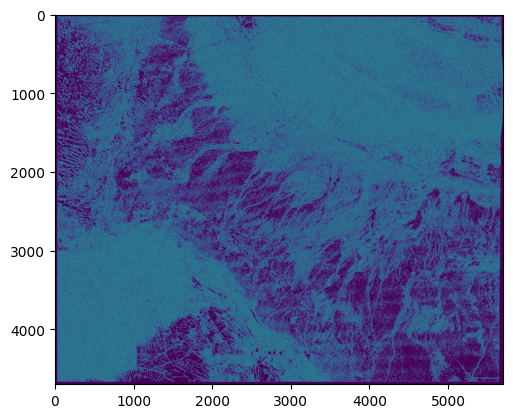

In [15]:
#Canny edge detection for image 1
try:

    img1 = cv2.imread("D:\mhrs\HH-ALPSRP245160560-H2.2_UA.tif")
    edges = cv2.Canny(img1, 15, 10)
    cv2.imwrite('result.tiff', edges)
 
except IOError:
    print('Error while reading files !!!')
plt.imshow(edges)

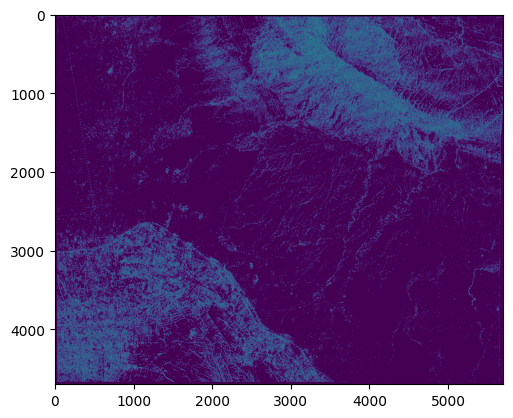

In [16]:
#Canny edge detection for image 2
try:

    img2 = cv2.imread("D:\mhrs\HV-ALPSRP245160560-H2.2_UA.tif")
    edges2 = cv2.Canny(img2, 15, 10)
    cv2.imwrite('result.tiff', edges2)
 
except IOError:
    print('Error while reading files !!!')
plt.imshow(edges2)

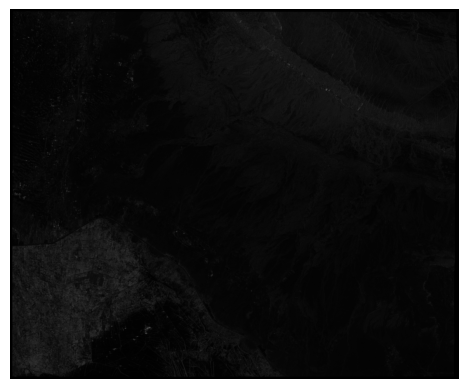

In [17]:
# RGB for image 1
img1 = cv2.imread("D:\mhrs\HH-ALPSRP245160560-H2.2_UA.tif")

img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

plt.imshow(img1_rgb)
plt.axis('off')
plt.show()

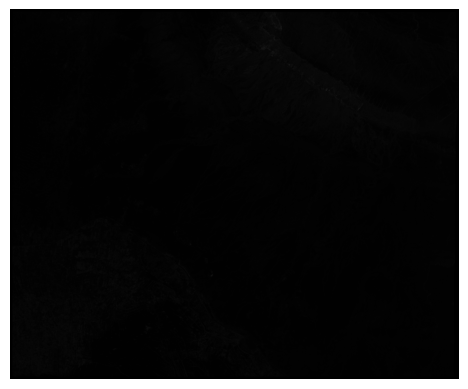

In [18]:
# RGB for image 2
img2 = cv2.imread("D:\mhrs\HV-ALPSRP245160560-H2.2_UA.tif")

img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

plt.imshow(img2_rgb)
plt.axis('off')
plt.show()